ECE 447: Dynamical Systems
===
Prof. Eric Klavins

&copy; 2019, University of Washington

Outline
---
* Libraries Needed
* Scalars and Vectors
* Dynamic Systems
* Dynamic Systems in Python
* Phase Portraits

Import required libraries
---

In [0]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
import math

%matplotlib inline

Representation of Scalars and Vectors
---



Dynamical Systems
---
Let x be an n dimensional vector. A continuous, autonomous dynamical system has the form
     
> $\dot x = f(x)$
 
 stating how each component changes with time. For example, to represent a falling object with height h and velocity v, we can write
 
> $\dot{\left (
\begin{array}{c} 
h \\ 
v
\end{array} \right )} = 
\left (
\begin{array}{c} 
v \\ 
-g/m
\end{array} \right )
$ 
      
where $g$ is a constant, the force due to gravity, and $m$ is another constant, the mass of the object.

In this case, 

> $x = \left (
\begin{array}{c}
  h \\ 
  v
\end{array} \right )$  and $f(x) = \left ( \begin{array}{c} 
v \\ 
-g/m
\end{array} \right )$




Dynamical Systems in Python
---

To represent the falling object system in Python, we write:

In [0]:
def f_rock(x,t):
  g = 9.81;
  m = 10.0;
  return [x[1],-g/m]

* Note that the vector $x$ and the return value of $f$ are represented in Python eas row vectors instead of as column vectors like in our text book. 
* Also note that the function `f_rock` also takes a second parameter,$ $t, which stands for time. This is because we will later be using these functions with Python's ordinary differential equation solver, and it needs functions of this form. Our model could include time explicitly in the vector it returns, but for now we will not use that feature.

Another example is a pendulum with angle theta and angular velocity omega.![alt text](https://raw.githubusercontent.com/klavins/ECE447/master/images/pendlum.png)

To model this system in Python we write:

In [0]:
def f_pendulum(x,t):
  theta,omega = x;
  g = 9.81;
  m = 1;
  l = 10;
  b = 0.5;
  return [omega,g*math.sin(theta)/l-b*omega]

Each of these models can be evaluated at particular values of x. For example, at the point h=1, v=0, the rock's rate of change (h') is zero m/s, and its acceleration (v') is m/s<sup>2</sup>.

Working with Dynamical System Functions
===

Each of these models can be evaluated at particular values of $x$. For example, at the point $h=1$, $v=0$, the rock's rate of change $\dot h$ is zero m/s, and its acceleration $\dot v$ is m/s<sup>2</sup>.

In [0]:
f_rock([1,0],0)

[0, -0.9810000000000001]

In [0]:
f_rock([0,1],0)

[1, -0.9810000000000001]

On the other hand, at the point h=1, v=1, the rate of change of h is v=1, while the acceleration is still -0.981 m/s<sup>2</sup>.

For the pendulum, it is interesting to evaluate the model at various critical points like (&pi;, 0), and so on.

In [0]:
[
    f_pendulum([0,0],0),
    f_pendulum([math.pi/2,0],0),
    f_pendulum([math.pi,0],0),
    f_pendulum([3*math.pi/2,0],0)
]

[[0, 0.0],
 [0, 0.9810000000000001],
 [0, 1.2013785099635534e-16],
 [0, -0.9810000000000001]]

This shows that the pendulum is not accelerating when it is pointing straight down or straight up, while it is experiences a clockwise angular acceleration when it is pointing to the right and a counterclockwise angular acceleration when it is pointing to the left. 

Phase Portraits
===

We can draw 2D system models by drawing vectors for a number of points in the plane. For example, with the pendulum we might grid theta into points from -2 &pi; to 2 &pi; and omega into points from -1 to 1. 

In Python, we can write the following to make a grid of values for which to evaluate the model.

In [0]:
theta = np.linspace(-2.0 * math.pi, 2.0 * math.pi, 19)
omega = np.linspace(-2, 2, 19)
Theta,Omega = np.meshgrid(theta,omega)

Next, we make a grid of vectors to store the resulting evaluations. We initialize it to zero at first.

In [0]:
u,v = np.zeros(Theta.shape), np.zeros(Omega.shape)

Then we evaluate the model at each point in the grid, storing the resulting vectors in u,v:

In [0]:
n,m = Theta.shape
for i in range(n):
  for j in range(m):
    xdot = f_pendulum([Theta[i,j],Omega[i,j]],0)
    u[i,j] = xdot[0]
    v[i,j] = xdot[1]

(-2.5, 2.5)

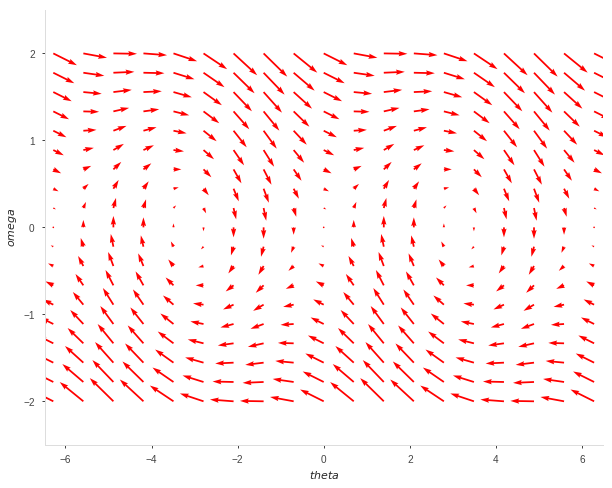

In [0]:
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = '#dddddd'
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['ytick.major.size'] = 3
plt.rcParams['xtick.color'] = '#444444'
plt.rcParams['ytick.color'] = '#444444'
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['figure.figsize'] = [10,8]
plt.grid(c='white')

Q = plt.quiver(Theta, Omega, u, v, color='r')
plt.xlabel('$theta$')
plt.ylabel('$omega$')
plt.xlim([-2*math.pi-0.2, 2*math.pi+0.2])
plt.ylim([-2.5, 2.5])

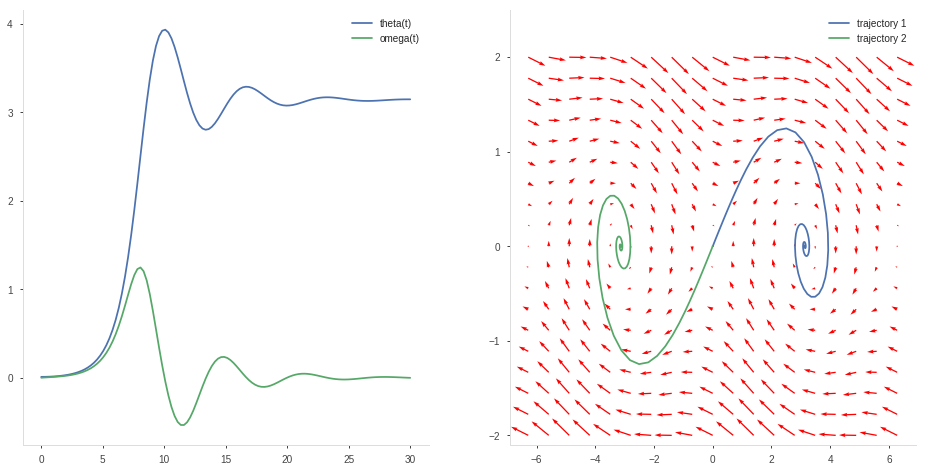

In [0]:
x0=[0.01,0];
t = np.linspace(0., 30, 120)
x1 = spi.odeint(f_pendulum,x0,t);
x0=[-0.01,0];
x2 = spi.odeint(f_pendulum,x0,t);
fig, ax = plt.subplots(1, 2, figsize=(16,8))

ax[0].plot(t,x1[:,0],label="theta(t)");
ax[0].plot(t,x1[:,1],label="omega(t)");
ax[1].plot(x1[:,0],x1[:,1],label="trajectory 1");
ax[1].plot(x2[:,0],x2[:,1],label="trajectory 2");
ax[1].quiver(Theta, Omega, u, v, color='r')
plt.ylim([-2.1, 2.5])
ax[0].legend();
ax[1].legend();